In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['axes.unicode_minus'] = False

sns.set_theme()

## getting drug sales dataset
file_path = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(file_path, 
                 parse_dates=['date'], 
                 index_col='date')
df.head()                

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   204 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [3]:
df.describe()

,value
count,204.000000
mean,10.694430
std,5.956998
min,2.814520
25%,5.844095
50%,9.319345
75%,14.289964
max,29.665356


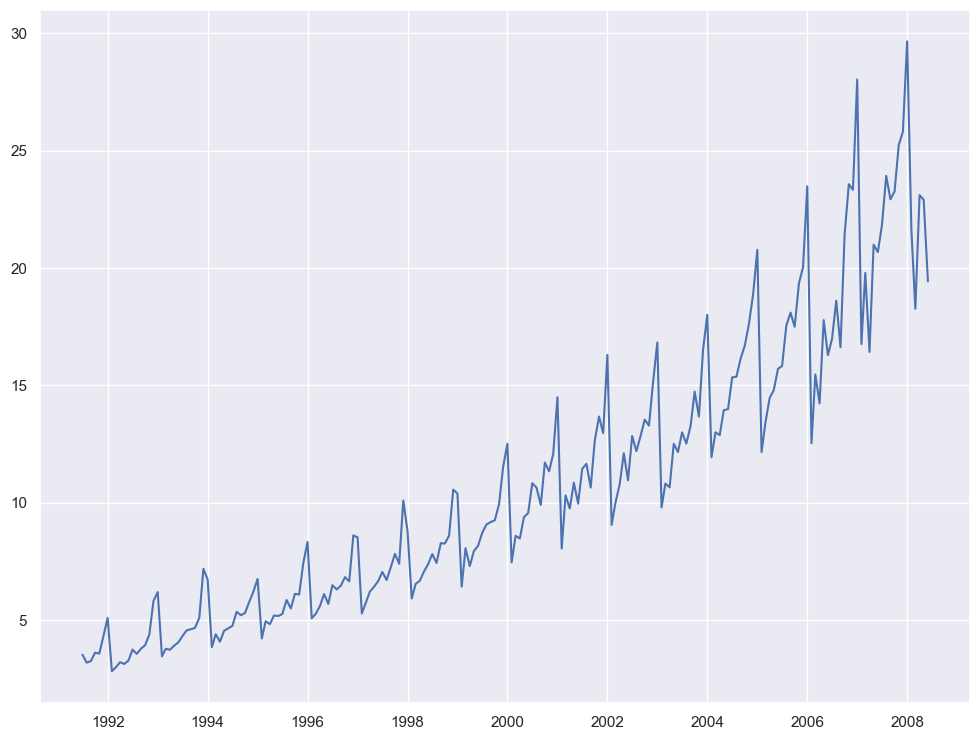

In [9]:
plt.plot(df)

plt.show()



In [8]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [10]:
df_train = df.iloc[:-12]
df_test = df.iloc[-12:]

In [11]:
df_train

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2007-02-01,16.763869
2007-03-01,19.792754
2007-04-01,16.427305


In [12]:
df_test

,value
date,
2007-07-01,21.834890
2007-08-01,23.930204
2007-09-01,22.930357
2007-10-01,23.263340
2007-11-01,25.250030
2007-12-01,25.806090
2008-01-01,29.665356
2008-02-01,21.654285
2008-03-01,18.264945


In [14]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
'''
[메소드 설명]
ExponentialSmoothing : 지수평활법
SimpleExpSmoothing : 단순지수평활법
Holt : Holt 선형 지수평활법
'''

# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(df_train, 
                          initialization_method="estimated").fit()

# Trend
fit2 = Holt(df_train, 
            initialization_method="estimated").fit()

# Exponential trend
fit3 = Holt(df_train,
            exponential=True, 
            initialization_method="estimated").fit()

# Additive damped trend
fit4 = Holt(df_train,
            damped_trend=True, 
            initialization_method="estimated").fit()

# Multiplicative damped trend
fit5 = Holt(df_train,
            exponential=True, 
            damped_trend=True, 
            initialization_method="estimated").fit()

In [15]:
print(fit1.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  value   No. Observations:                  192
Model:             SimpleExpSmoothing   SSE                            692.196
Optimized:                       True   AIC                            250.216
Trend:                           None   BIC                            256.731
Seasonal:                        None   AICC                           250.430
Seasonal Periods:                None   Date:                 Fri, 24 Feb 2023
Box-Cox:                        False   Time:                         09:11:15
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3062819                alpha                 True
initial_level              3.4872871                

In [16]:
print(fit2.summary())

                              Holt Model Results                              
Dep. Variable:                  value   No. Observations:                  192
Model:                           Holt   SSE                            631.552
Optimized:                       True   AIC                            236.611
Trend:                       Additive   BIC                            249.641
Seasonal:                        None   AICC                           237.066
Seasonal Periods:                None   Date:                 Fri, 24 Feb 2023
Box-Cox:                        False   Time:                         09:11:42
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0532900                alpha                 True
smoothing_trend            0.0532900                

In [17]:
print(fit3.summary())

                              Holt Model Results                              
Dep. Variable:                  value   No. Observations:                  192
Model:                           Holt   SSE                            582.317
Optimized:                       True   AIC                            221.028
Trend:                 Multiplicative   BIC                            234.058
Seasonal:                        None   AICC                           221.482
Seasonal Periods:                None   Date:                 Fri, 24 Feb 2023
Box-Cox:                        False   Time:                         09:11:43
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level           1.4901e-08                alpha                 True
smoothing_trend           3.4494e-09                

In [18]:
print(fit4.summary())

                              Holt Model Results                              
Dep. Variable:                  value   No. Observations:                  192
Model:                           Holt   SSE                            641.058
Optimized:                       True   AIC                            241.480
Trend:                       Additive   BIC                            257.767
Seasonal:                        None   AICC                           242.089
Seasonal Periods:                None   Date:                 Fri, 24 Feb 2023
Box-Cox:                        False   Time:                         09:11:43
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0649473                alpha                 True
smoothing_trend            0.0649473                

In [19]:
print(fit5.summary())

                              Holt Model Results                              
Dep. Variable:                  value   No. Observations:                  192
Model:                           Holt   SSE                            621.345
Optimized:                       True   AIC                            235.483
Trend:                 Multiplicative   BIC                            251.771
Seasonal:                        None   AICC                           236.092
Seasonal Periods:                None   Date:                 Fri, 24 Feb 2023
Box-Cox:                        False   Time:                         09:11:43
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0400531                alpha                 True
smoothing_trend            0.0400531                